In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris-data.csv')

In [3]:
iris.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


*If there is a missing value, there will be a True*

In [5]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


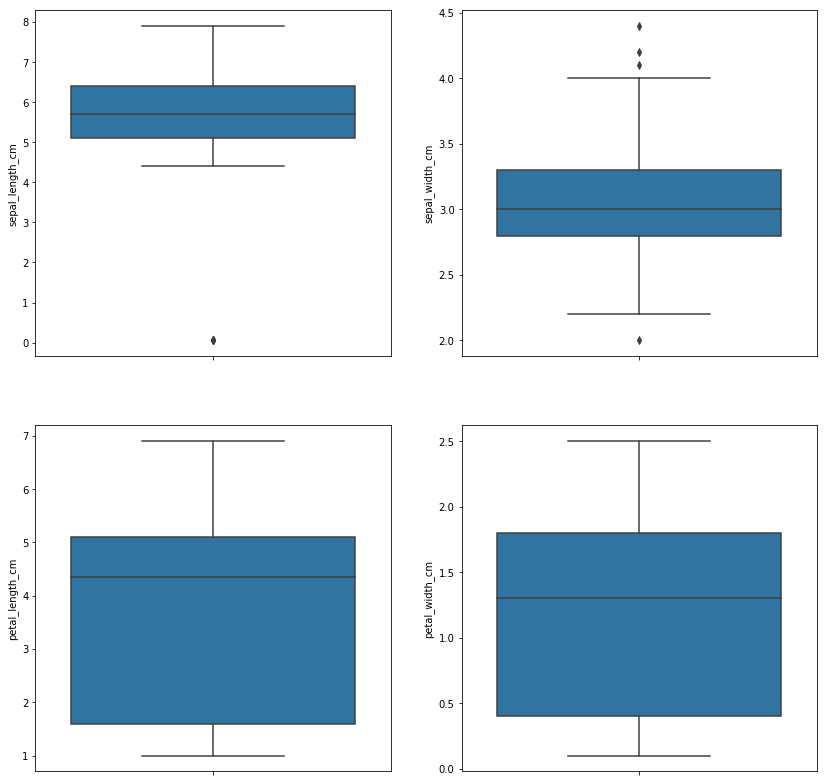

In [6]:
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(14,14))

sns.boxplot(y = iris.sepal_length_cm, ax=ax1)
sns.boxplot(y = iris.sepal_width_cm, ax=ax2)
sns.boxplot(y = iris.petal_length_cm, ax=ax3)
sns.boxplot(y = iris.petal_width_cm, ax=ax4)
plt.show()

## *Visualization length and width petal* corr value = 0.95

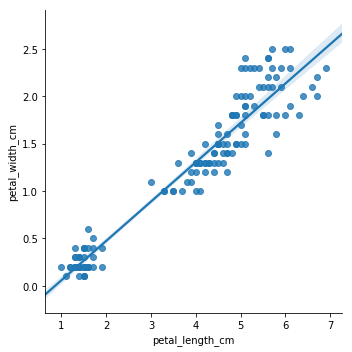

In [7]:
petal= sns.lmplot('petal_length_cm','petal_width_cm',fit_reg=True, data = iris)

## *Visualization sepal_length and  petal_width* corr = 0.48

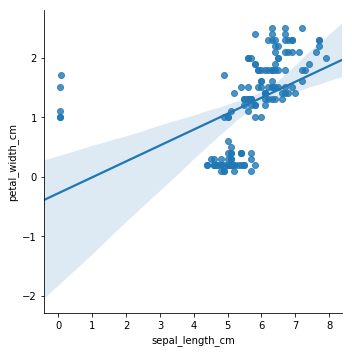

In [8]:
petal= sns.lmplot('sepal_length_cm','petal_width_cm',fit_reg=True, data = iris)

### What are these data with low sepal lenght and high petal_width???

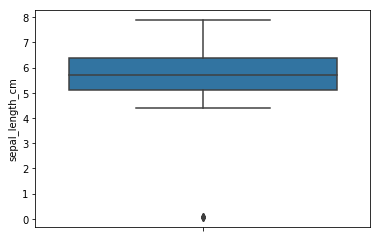

In [9]:
petal= sns.boxplot(y='sepal_length_cm', data = iris)

In [10]:
toolow = iris.loc[iris['sepal_length_cm'] < 3]

toolow

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


### We decide remove these 5 rows from the 150 entries

In [11]:
iris_clean = iris.drop(toolow.index,axis=0)

### We check there are not these data

In [12]:
iris_clean.loc[iris_clean['sepal_length_cm'] < 1]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


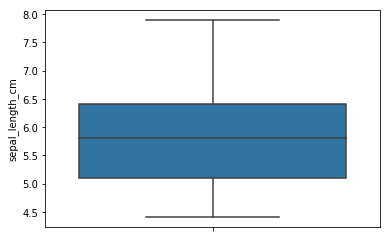

In [13]:
petal= sns.boxplot(y='sepal_length_cm', data = iris_clean)

In [14]:
iris_clean.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.114806,0.851241,0.796611
sepal_width_cm,-0.114806,1.000000,-0.428771,-0.362677
petal_length_cm,0.851241,-0.428771,1.000000,0.959093
petal_width_cm,0.796611,-0.362677,0.959093,1.000000


## *Visualization sepal_length and  petal_length* corr = 0.46


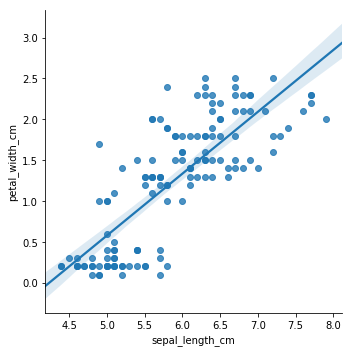

In [15]:
petal= sns.lmplot('sepal_length_cm','petal_width_cm',fit_reg=True, data = iris_clean)

### With this new data(iris_clean), we check all features again

In [16]:
iris_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     140 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [17]:
iris_clean.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,140.000000
mean,5.837241,3.068276,3.746897,1.235714
std,0.813936,0.431680,1.790564,0.766574
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.350000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
corr_clean = iris_clean.corr()
corr_clean

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.114806,0.851241,0.796611
sepal_width_cm,-0.114806,1.000000,-0.428771,-0.362677
petal_length_cm,0.851241,-0.428771,1.000000,0.959093
petal_width_cm,0.796611,-0.362677,0.959093,1.000000


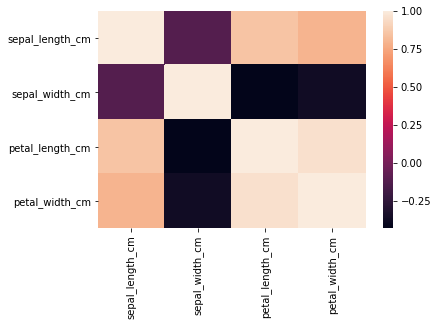

In [20]:
sns.heatmap(corr_clean, xticklabels=corr_clean.columns,yticklabels=corr_clean.columns)
plt.show()

### Let's take care about the Nan values.

In [21]:
nan = iris_clean.isna().any()

In [22]:
iris_clean.loc[iris_clean['petal_width_cm'].isnull()== True]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


### Insted of remove the rows of Nan Values, we want to calculate as interpolate with the other data

In [23]:
iris_clean  =iris_clean.interpolate()

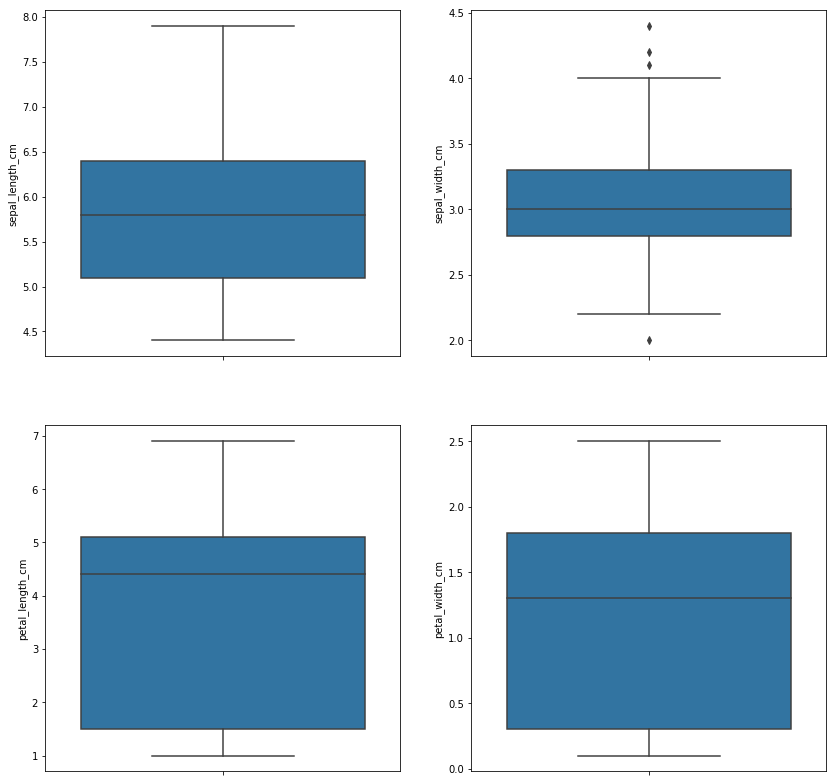

In [24]:
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(14,14))

sns.boxplot(y = iris_clean.sepal_length_cm, ax=ax1)
sns.boxplot(y = iris_clean.sepal_width_cm, ax=ax2)
sns.boxplot(y = iris_clean.petal_length_cm, ax=ax3)
sns.boxplot(y = iris_clean.petal_width_cm, ax=ax4)
plt.show()

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


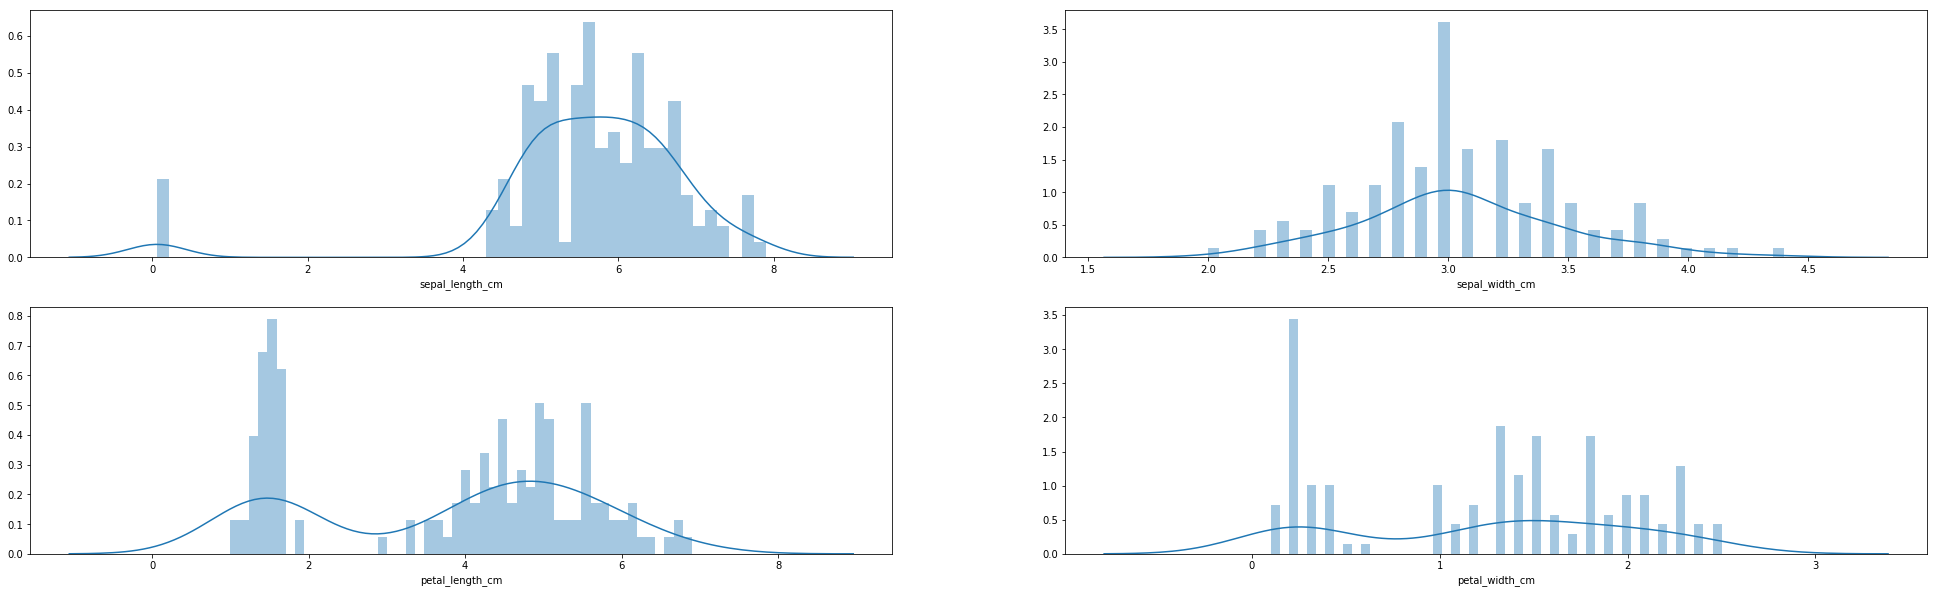

In [25]:
f,((ax1,ax2),
   (ax3,ax4)) = plt.subplots(2, 2, figsize=(34,10))
sns.distplot(iris.sepal_length_cm, bins=50, ax=ax1)
sns.distplot(iris.sepal_width_cm,bins=50, ax=ax2)
sns.distplot(iris.petal_length_cm,bins=50,ax=ax3)
sns.distplot(iris.petal_width_cm,bins=50, ax=ax4)
plt.show()

### Let's chech the object class

In [26]:
iris_clean['class'].unique()


array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [27]:
# Your code here
clases =list(['versicolor','virginica','setos'])
for element in clases:
    iris_clean[element] = iris_clean['class'].str.contains(element,na= True, regex=True).astype(int)
iris_clean.sample()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,versicolor,virginica,setos
55,5.7,2.8,4.5,1.3,Iris-versicolor,1,0,0


In [28]:
iris_clean.drop('class',axis=1,inplace=True)

In [29]:
iris_clean.rename(columns={'versicolor':'Iris-versicolor','virginica':'Iris-virginica','setos':'Iris-Setosa'},inplace=True)
iris_clean.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Iris-versicolor,Iris-virginica,Iris-Setosa
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1


## Let's save the new data clean to CSV

In [30]:
iris_clean.to_csv('iris_clean.csv')